In [3]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram,linkage
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('/content/customer_segmentation.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [9]:
df['Income']=df['Income'].fillna(df['Income'].median()).astype(int)
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [18]:
lb_encoder=LabelEncoder()
df['Education']=lb_encoder.fit_transform(df['Education'])
df['Marital_Status']=lb_encoder.fit_transform(df['Marital_Status'])
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue
0,5524,1957,2,4,58138,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11
1,2174,1954,2,4,46344,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11
2,4141,1965,2,5,71613,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11
3,6182,1984,2,5,26646,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11
4,5324,1981,4,3,58293,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11


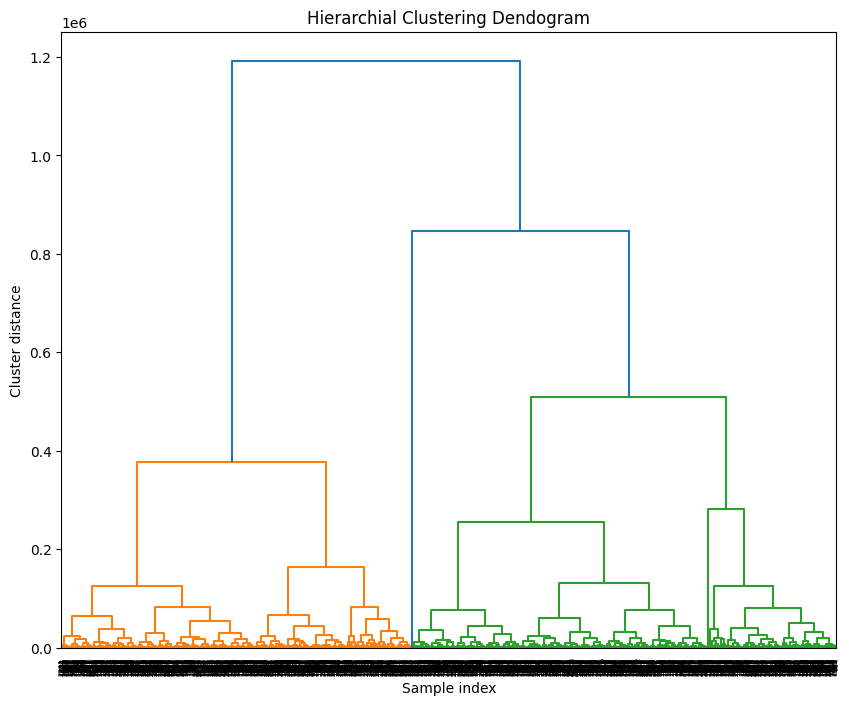

In [22]:
X=df
#dendogram
plt.figure(figsize=(10,8))
linked=linkage(X,method='ward')
dendrogram(linked,
           orientation='top',
           distance_sort='desending',show_leaf_counts=True)
plt.title('Hierarchial Clustering Dendogram')
plt.xlabel('Sample index')
plt.ylabel('Cluster distance')
plt.show()

In [23]:
model=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
df['cluster label']=model.fit_predict(X)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,cluster label
0,5524,1957,2,4,58138,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,0
1,2174,1954,2,4,46344,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,1
2,4141,1965,2,5,71613,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,2,5,26646,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,1
4,5324,1981,4,3,58293,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [31]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
df_pca=pca.fit_transform(X)
df_pca=pd.DataFrame(df_pca,columns=['PC1','PC2'])
df_pca['PCA cluster']=model.labels_
df_pca.head()

,PC1,PC2,PCA cluster
0,5904.427355,-79.564956,0
1,-5902.759020,-3407.104389,1
2,19372.465949,-1484.149275,0
3,-25592.898636,634.017711,1
4,6053.018450,-277.907587,0


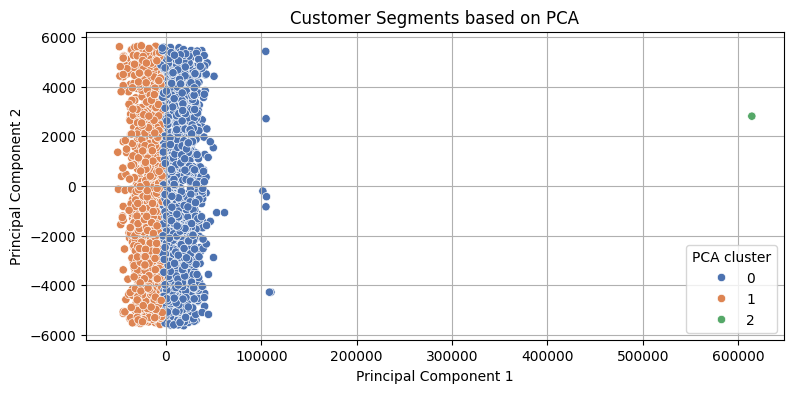

In [34]:
plt.figure(figsize=(9,4))
sns.scatterplot(x='PC1',y='PC2',hue='PCA cluster',data=df_pca,palette='deep',legend='full')
plt.title('Customer Segments based on PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()